In [1]:
import os
import matplotlib.pyplot as plt


In [2]:
train_path = '/content/drive/MyDrive/Malaria image/cell_images/cell_images/train'

In [3]:
train_infected_path = '/content/drive/MyDrive/Malaria image/cell_images/cell_images/train/parasitized'

In [4]:
os.listdir(train_infected_path)[0]

'C91P52ThinF_IMG_20150821_124937_cell_213.png'

In [5]:
para_img = plt.imread(train_infected_path+'/C91P52ThinF_IMG_20150821_124937_cell_213.png')

In [6]:
para_img.shape

(187, 193, 3)

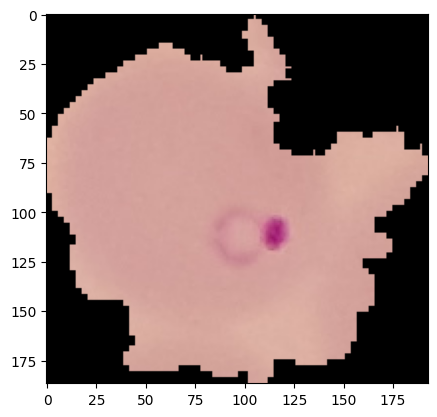

In [7]:
plt.imshow(para_img)

In [8]:
para_img.shape

(187, 193, 3)

In [9]:
uninfected_path = '/content/drive/MyDrive/Malaria image/cell_images/cell_images/train/uninfected'

In [10]:
os.listdir(uninfected_path)[10]

'C83P44ThinF_IMG_20150817_134820_cell_164.png'

In [11]:
uninfected_img = plt.imread(uninfected_path + '/C83P44ThinF_IMG_20150817_134820_cell_164.png')

In [12]:
uninfected_img.shape

(184, 130, 3)

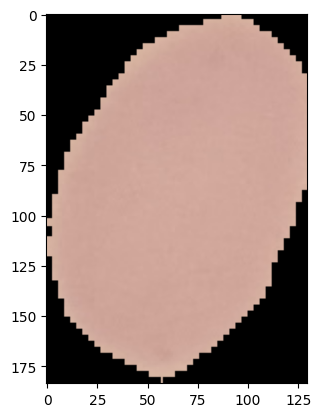

In [13]:
plt.imshow(uninfected_img)

In [14]:
len(os.listdir(uninfected_path))

12559

In [15]:
test_uninfected = '/content/drive/MyDrive/Malaria image/cell_images/cell_images/test/uninfected'

In [16]:
os.listdir(test_uninfected)[0]

'C147P108ThinF_IMG_20151115_101156_cell_100.png'

In [17]:
dim1 =[]
dim2 = []

for image_file in os.listdir(test_uninfected):
  image_array = plt.imread(test_uninfected + '/' + image_file)
  d1,d2,color = image_array.shape
  dim1.append(d1)
  dim2.append(d2)



In [18]:
import numpy as np
np.mean(dim1)

130.92538461538462

In [19]:
np.mean(dim2)

130.75

In [20]:
import seaborn as sns

In [21]:
image_shape = (130,130,3)

Text(0, 0.5, 'height')

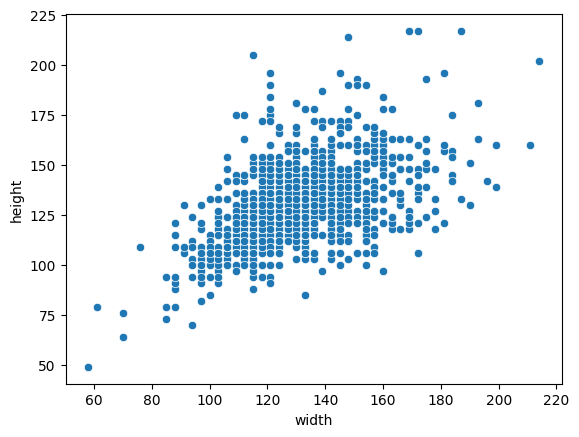

In [22]:
sns.scatterplot(x=dim1, y=dim2)
plt.xlabel('width')
plt.ylabel('height')

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )


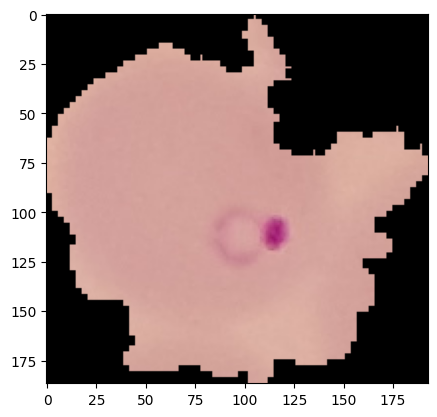

In [25]:
plt.imshow(para_img)

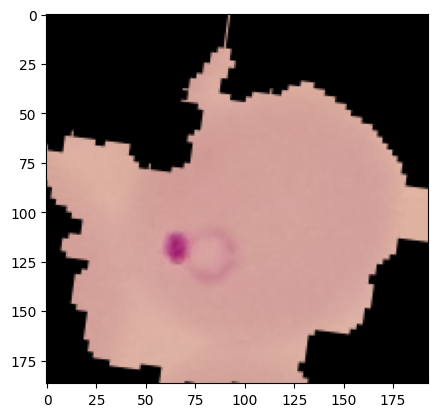

In [26]:
plt.imshow(image_gen.random_transform(para_img))

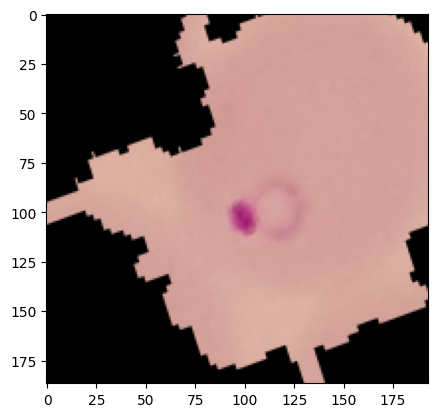

In [27]:
plt.imshow(image_gen.random_transform(para_img))


In [28]:
image_gen.flow_from_directory(train_path)

Found 25095 images belonging to 2 classes.


In [29]:
test_path = '/content/drive/MyDrive/Malaria image/cell_images/cell_images/test'

In [30]:
image_gen.flow_from_directory(test_path)

Found 2610 images belonging to 2 classes.


In [31]:
image_shape

(130, 130, 3)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

In [33]:
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [35]:
image_shape[:2]

(130, 130)

In [36]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',
                                                batch_size=16, class_mode='binary')

Found 25095 images belonging to 2 classes.


In [37]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',
                                                batch_size=16, class_mode='binary', shuffle=False)

Found 2610 images belonging to 2 classes.


In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [40]:
model.fit_generator(train_image_gen,epochs=20, validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/20
1569/1569 [==============================] - 3974s 3s/step - loss: 0.8806 - accuracy: 0.5421 - val_loss: 0.6858 - val_accuracy: 0.5414
Epoch 2/20
1569/1569 [==============================] - 201s 128ms/step - loss: 0.6828 - accuracy: 0.5648 - val_loss: 0.6888 - val_accuracy: 0.5705
Epoch 3/20
1569/1569 [==============================] - 199s 127ms/step - loss: 0.6829 - accuracy: 0.5738 - val_loss: 0.6773 - val_accuracy: 0.5732
Epoch 4/20
1569/1569 [==============================] - 202s 129ms/step - loss: 0.6756 - accuracy: 0.5828 - val_loss: 0.6698 - val_accuracy: 0.5981
Epoch 5/20
1569/1569 [==============================] - 200s 128ms/step - loss: 0.6723 - accuracy: 0.5880 - val_loss: 0.6737 - val_accuracy: 0.5897
Epoch 6/20
1569/1569 [==============================] - 200s 127ms/step - loss: 0.6933 - accuracy: 0.5904 - val_loss: 0.6744 - val_accuracy: 0.6038


In [42]:
import pandas as pd
losses = pd.DataFrame(model.history.history)

In [43]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.880570,0.542140,0.685803,0.541379
1,0.682777,0.564814,0.688808,0.570498
2,0.682907,0.573819,0.677307,0.573180
3,0.675624,0.582825,0.669758,0.598084
4,0.672306,0.588006,0.673737,0.589655
5,0.693310,0.590436,0.674431,0.603831


<Axes: >

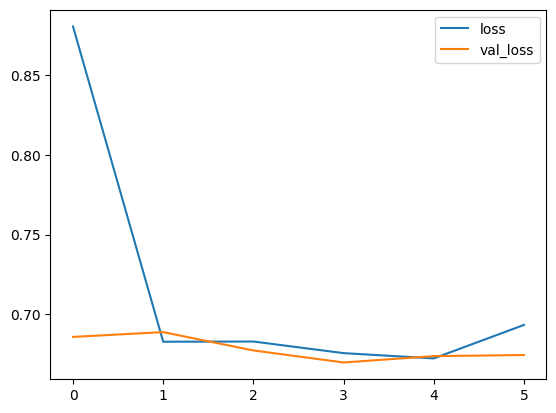

In [44]:
losses[['loss','val_loss']].plot()

<Axes: >

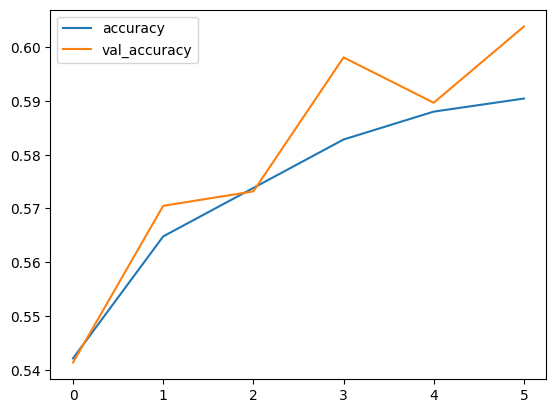

In [46]:
losses[['accuracy','val_accuracy']].plot()

In [47]:
model.evaluate_generator(test_image_gen)

[0.6822006702423096, 0.5980842709541321]

In [48]:
prediction = model.predict_generator(test_image_gen)

In [54]:
prediction = (prediction>0.5).astype(int)

In [57]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [61]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

In [60]:
print(classification_report(test_image_gen.classes, prediction))

              precision    recall  f1-score   support

           0       0.58      0.71      0.64      1310
           1       0.62      0.49      0.55      1300

    accuracy                           0.60      2610
   macro avg       0.60      0.60      0.59      2610
weighted avg       0.60      0.60      0.59      2610



In [62]:
cm = confusion_matrix(test_image_gen.classes, prediction)

In [65]:
cm

array([[929, 381],
       [665, 635]])

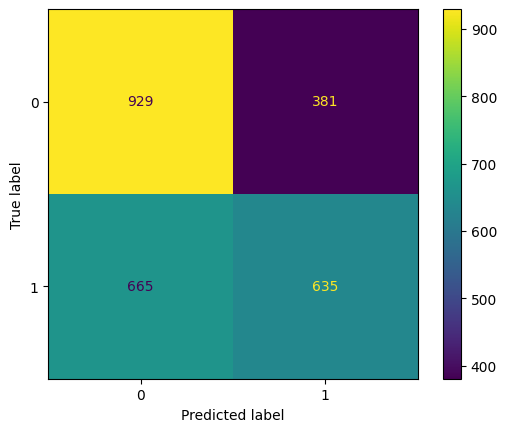

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [67]:
from tensorflow.keras.preprocessing import image

**Predicting on an Image**

In [70]:
os.listdir('/content/drive/MyDrive/Malaria image/cell_images/cell_images/train/parasitized')[150]

'C94P55ThinF_IMG_20150821_165118_cell_264.png'

In [72]:
para_cell = '/content/drive/MyDrive/Malaria image/cell_images/cell_images/train/parasitized/C94P55ThinF_IMG_20150821_165118_cell_264.png'

In [73]:
para_cell

'/content/drive/MyDrive/Malaria image/cell_images/cell_images/train/parasitized/C94P55ThinF_IMG_20150821_165118_cell_264.png'

In [76]:
my_img = image.load_img(para_cell,target_size=image_shape)

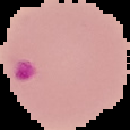

In [77]:
my_img

In [78]:
my_img = image.img_to_array(my_img)

In [80]:
my_img.shape

(130, 130, 3)

In [81]:
import numpy as np

In [85]:
my_image = np.expand_dims(my_img, axis=0)

In [89]:
(model.predict(my_image, verbose=0)>0.5).astype(int)

array([[0]])

In [87]:
train_image_gen.class_indices


{'parasitized': 0, 'uninfected': 1}